# Airlines Customer satisfaction

This data given by an airline organization. The actual name of the company is not given due to various purposes that's why the name Invistico airlines.

The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to predict whether a future customer would be satisfied with their service given the details of the other parameters values.

Also the airlines need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.

Following factors are considered to find whether the customer is satisfied or dissatisfied.
* Gender
* Customer Type
* Age
* Type of Travel
* Class
* Flight Distance
* Seat comfort
* Departure/Arrival time convenient
* Food and drink 
* Gate location
* Inflight wifi service', 'Inflight entertainment', 
* Online support',
* Ease of Online booking
* On-board service
* Leg room service',
* Baggage handling
* Checkin service 
* Cleanliness 
* Online boarding',
* Departure Delay in Minutes
* Arrival Delay in Minutes

Dataset: https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction/

## Importing Libraries and Dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# models import
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
df=pd.read_csv('/content/drive/My Drive/datasets/Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


## EDA and Visualization

In [10]:
#df.info()

In [11]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are some null values in the column 'Arrival Delay in Minutes'.

In [12]:
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [13]:
df_c=df.copy()
df.dropna(inplace=True)

Rows containing null values are dropped because there are few such rows in compared to total numvber of entries.

In [14]:
category = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]
for c in category:
    print ("{} \n".format(df[c].value_counts()))
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'dissatisfied':0})

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64 

Female    65703
Male      63784
Name: Gender, dtype: int64 

Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64 

Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64 

Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64 



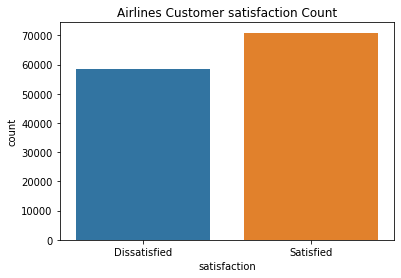

In [15]:
sn.countplot(x="satisfaction", data=df)
plt.title('Airlines Customer satisfaction Count')
plt.xticks([0,1],['Dissatisfied',"Satisfied"])
plt.show()

In our data, number of both satisfied and dissatisfied cutomer are almosrt equal. So, our datasetr is balanced.

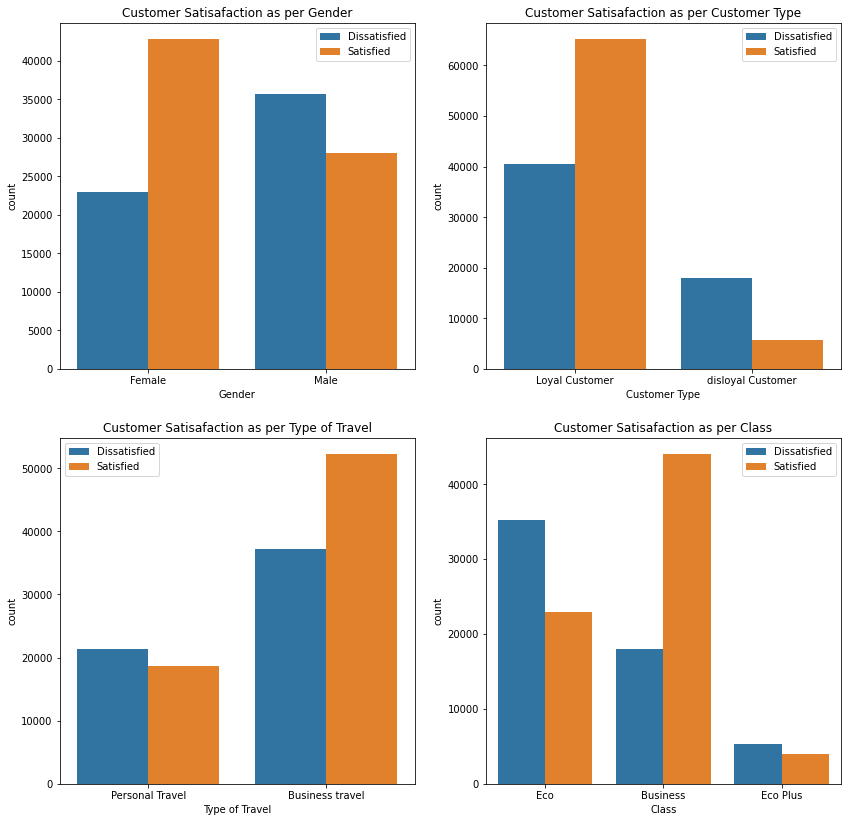

In [16]:
fig,axs = plt.subplots(2,2,figsize=(14, 14))
cols=['Gender', 'Customer Type', 'Type of Travel', 'Class']
c=0
for i in range(2):
  for j in range(2):
    sn.countplot(data=df,x=cols[c],hue='satisfaction',ax=axs[i][j])
    axs[i][j].set_title('Customer Satisafaction as per {}'.format(cols[c]))
    axs[i][j].legend(['Dissatisfied',"Satisfied"])
    c+=1

From the abovce charts, we can conbclude that:
* Comparitively, female customers are more satisfied than male customers.
* Loyal Customers are more satisfied than disloyal ones.
* People who travel for business purpose are more satisfied than ones who travel for personal purpose.
* More number of people travel in Business class and are also comparitively more satisfied than customers travelling in economy or economy plus class.

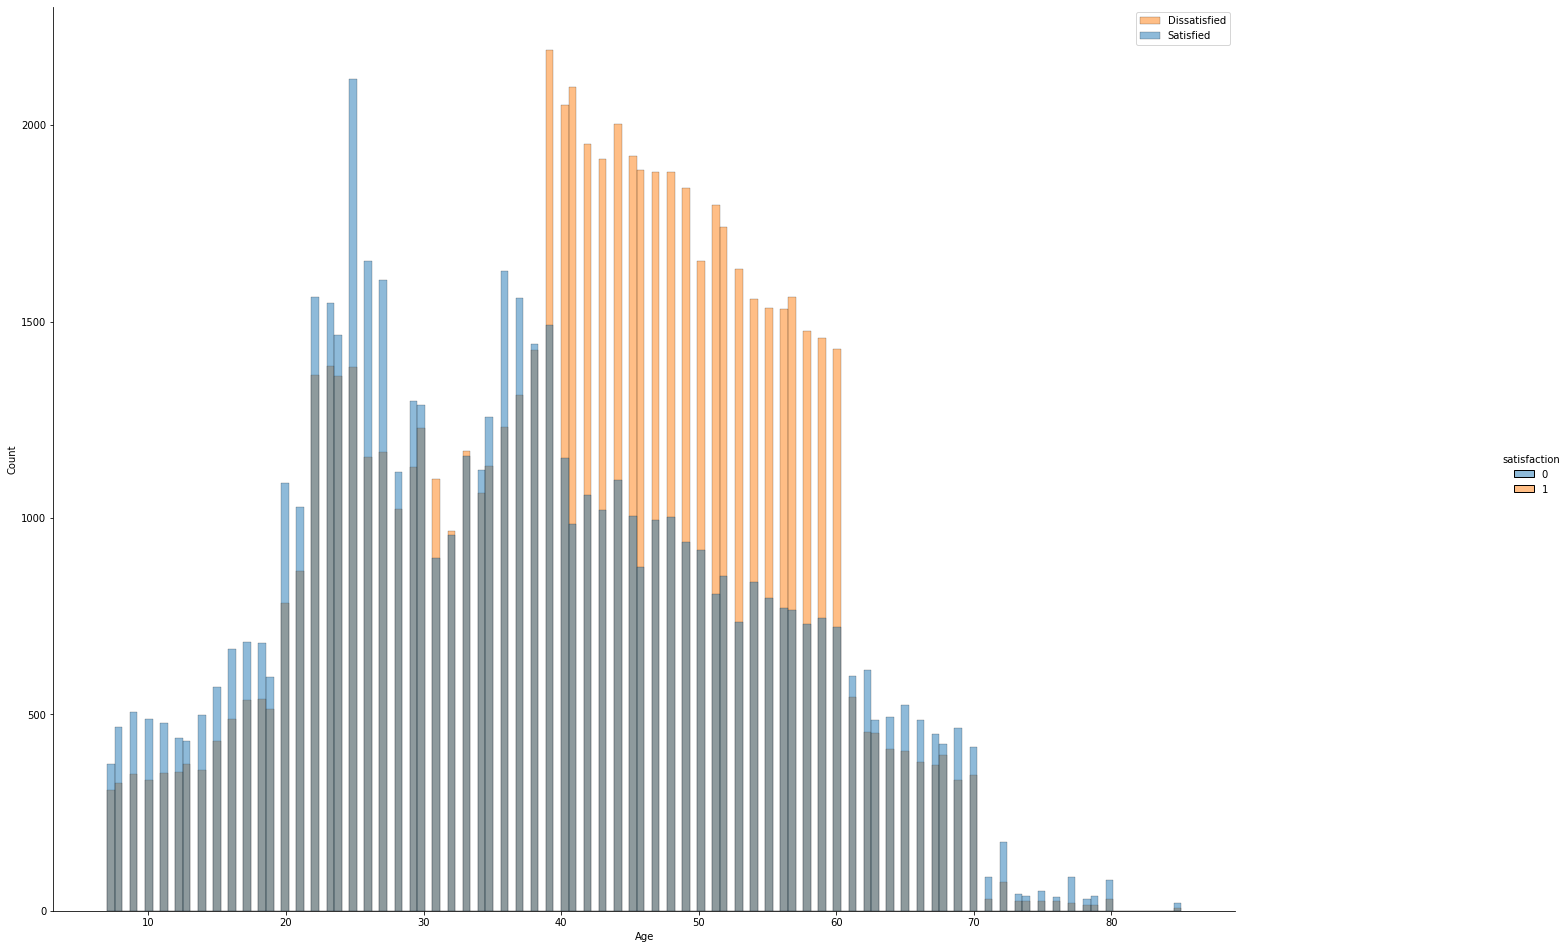

In [17]:
fg=sn.displot(df,x='Age',binwidth=0.55,hue='satisfaction')
fg.fig.set_figwidth(24.27)
fg.fig.set_figheight(14.7)
plt.legend(['Dissatisfied',"Satisfied"])
plt.show()

Customers of age group between 39 to 60 are more satisfied than customers of other age group.

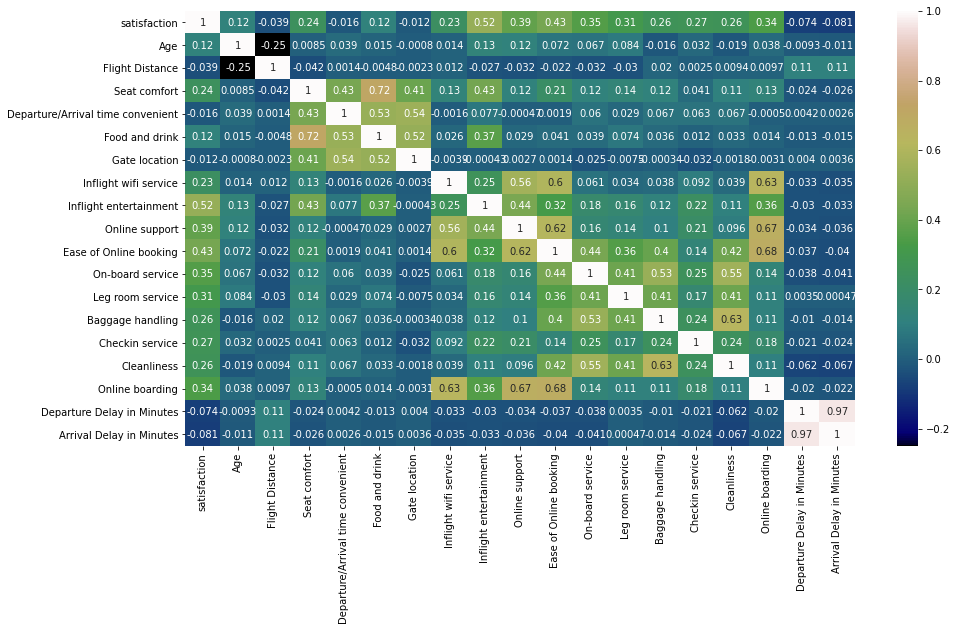

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sn.heatmap(df.corr(),cmap='gist_earth',annot=True)
plt.show()

The factors like Flight Distance, Departure/Arrival time convenient,Gate location,Departure Delay in Minutes and Arrival Delay in Minutes have very low impact on customer satisfaction. So, we are going to drop those columns to reduce model complexity.

In [18]:
df.drop(['Flight Distance','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,1,Female,Loyal Customer,65,Personal Travel,Eco,0,0,2,4,2,3,3,0,3,5,3,2
1,1,Male,Loyal Customer,47,Personal Travel,Business,0,0,0,2,2,3,4,4,4,2,3,2
2,1,Female,Loyal Customer,15,Personal Travel,Eco,0,0,2,0,2,2,3,3,4,4,4,2
3,1,Female,Loyal Customer,60,Personal Travel,Eco,0,0,3,4,3,1,1,0,1,4,1,3
4,1,Female,Loyal Customer,70,Personal Travel,Eco,0,0,4,3,4,2,2,0,2,4,2,5


In [ ]:
df.shape

(129487, 18)

In [19]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X.shape

(129487, 17)

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,3,4])],remainder='passthrough')
X = np.array(ct.fit_transform(X),dtype=np.float)

We converted categorical value into numerical form just like a truth table and droped the original columns for them

In [ ]:
X.shape

(129487, 22)

# Model Selection

## Data Scaling and splitting

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.9, random_state=0)

sc_X  = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)
X_sc = sc_X.transform(X)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)
X = min_max_scaler.fit_transform(X)

X_train.shape,X_test.shape

((116538, 22), (12949, 22))

In [22]:
#function to plot learning curve for any classifier
from sklearn.model_selection import learning_curve, validation_curve
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Train Score")
    plt.plot(train_sizes, test_scores_mean, label="Test Score")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Train Sizes', fontsize = 14)
    plt.ylabel('Score', fontsize = 14)
    plt.show()

## Logistic Regression

In [ ]:
#standard scaled
log_reg1=LogisticRegression(max_iter=2500)
log_reg1.fit(X_train_sc,y_train)
pred_log1=log_reg1.predict(X_test_sc)

print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log1))
print('Accuracy is', accuracy_score(y_test,pred_log1))

Confusion Matrix is
 [[4815 1067]
 [1087 5980]]
Accuracy is 0.8336551085025871


In [ ]:
#without scaling
log_reg3=LogisticRegression(max_iter=2500)
log_reg3.fit(X_train,y_train)
pred_log3=log_reg3.predict(X_test)

print("Test Scores")
print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log3))
print('Accuracy is\n', accuracy_score(y_test,pred_log3))


pred_log_train=log_reg3.predict(X_train)
print("Train Scores")
print('Confusion Matrix is\n',confusion_matrix(y_train,pred_log_train))
print('Accuracy is', accuracy_score(y_train,pred_log_train))


Test Scores
Confusion Matrix is
 [[4814 1068]
 [1087 5980]]
Accuracy is
 0.8335778824619662
Train Scores
Confusion Matrix is
 [[42827  9896]
 [ 9674 54141]]
Accuracy is 0.8320719421991111


Unscaled input features gives less accuracy. Also, more entries are wrongly classified than before.

In [ ]:
#using min_max scaling
log_reg2=LogisticRegression(max_iter=2500)
log_reg2.fit(X_train_minmax,y_train)
pred_log2=log_reg2.predict(X_test_minmax)

print("Test Score")
print('Confusion Matrix is\n',confusion_matrix(y_test,pred_log2))
print('Accuracy is', accuracy_score(y_test,pred_log2))

pred_log_train2=log_reg3.predict(X_train)
print("\nTrain Scores")
print('Confusion Matrix is\n',confusion_matrix(y_train,pred_log_train2))
print('Accuracy is', accuracy_score(y_train,pred_log_train2))


Test Score
Confusion Matrix is
 [[5069  813]
 [1325 5742]]
Accuracy is 0.8348907251525214

Train Scores
Confusion Matrix is
 [[42827  9896]
 [ 9674 54141]]
Accuracy is 0.8320719421991111


Sacled data using MinMax scaling performed better than other scaling methods and unscaled data.

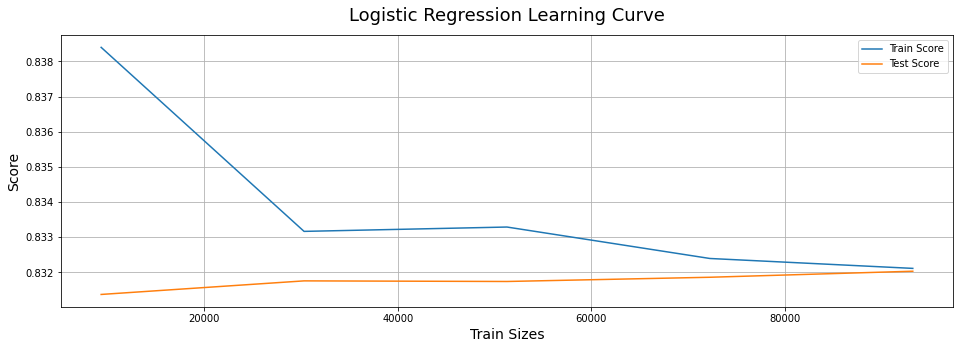

In [ ]:
plt.figure(figsize = (16,5))
title = 'Logistic Regression Learning Curve'
plotLearningCurves(X_train_minmax, y_train, log_reg2,title)


As train size increase, trainining score and cross validation score are converging which means less deviation in accuracy.

## KNeighbours Classifier

In [ ]:
for k in range(10,18):
  knn = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) 
  knn.fit(X_train_sc,y_train)
  pred_knn = knn.predict(X_test_sc)

  print("k=",k)
  print('Confusion Matrix is ',confusion_matrix(y_test,pred_knn))
  print('Accuracy is', accuracy_score(y_test,pred_knn))
  print('\n')

k= 10
Confusion Matrix is  [[5582  300]
 [ 741 6326]]
Accuracy is 0.9196076917136459


k= 11
Confusion Matrix is  [[5512  370]
 [ 653 6414]]
Accuracy is 0.920997760444822


k= 12
Confusion Matrix is  [[5571  311]
 [ 739 6328]]
Accuracy is 0.9189126573480577


k= 13
Confusion Matrix is  [[5517  365]
 [ 665 6402]]
Accuracy is 0.9204571781604757


k= 14
Confusion Matrix is  [[5564  318]
 [ 731 6336]]
Accuracy is 0.9189898833886787


k= 15
Confusion Matrix is  [[5508  374]
 [ 658 6409]]
Accuracy is 0.9203027260792339


k= 16
Confusion Matrix is  [[5553  329]
 [ 728 6339]]
Accuracy is 0.9183720750637114


k= 17
Confusion Matrix is  [[5511  371]
 [ 669 6398]]
Accuracy is 0.9196849177542668




Knn algortihm performed best when value of k_neighjbours equals 11. So let's find the model's performance on both training and test sets.
Performance was bettwe with scaled data scaled using StandardScaler.

In [34]:

knn = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2) 
knn.fit(X_train_sc,y_train)

knn_train = knn.predict(X_train_sc)
knn_test= knn.predict(X_test_sc)

print("For Test")
print('Confusion Matrix is \n',confusion_matrix(y_test,knn_test))
print('Accuracy is', accuracy_score(y_test,knn_test))
print('\n')

print("For Train")
print('Confusion Matrix is\n ',confusion_matrix(y_train,knn_train))
print('Accuracy is', accuracy_score(y_train,knn_train))
print('\n')

For Test
Confusion Matrix is 
 [[5512  370]
 [ 653 6414]]
Accuracy is 0.920997760444822


For Train
Confusion Matrix is
  [[50106  2617]
 [ 4988 58827]]
Accuracy is 0.9347423158111517




Accuracy has improved than before when kneighbours algorithm is used. Also, number of false prediction have dropped significantly.

In [ ]:
plt.figure(figsize = (16,5))
title = 'kNeighbours Learning Curve'
plotLearningCurves(X_train_sc, y_train, knn,title)

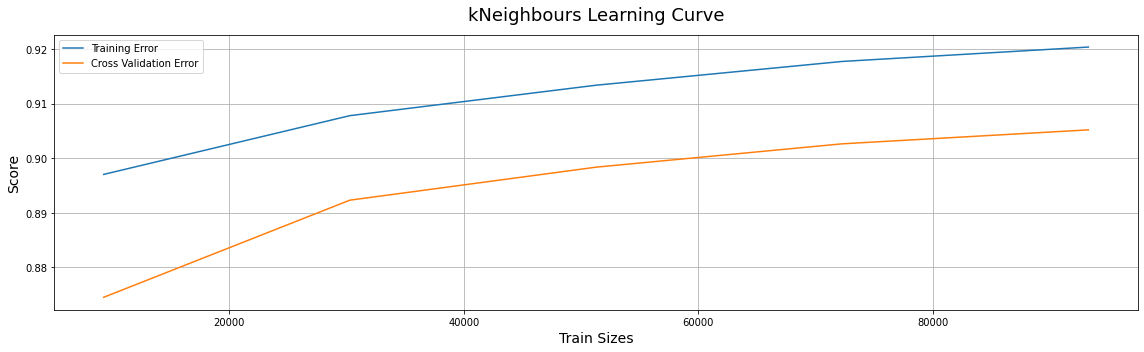

As seen from learning curve, both test and train score are increasing with increase in test size. It shows good fit of data in our model.

## Decision Tree

In [ ]:
for d in range(20,30):
  dtc = DecisionTreeClassifier(criterion='entropy', max_depth=d,max_leaf_nodes=1000)
  dtc.fit(X_train,y_train)
  pred_dtc=dtc.predict(X_test)
  print("d=",d)
  print(accuracy_score(y_test,pred_dtc))

d= 20
0.9456677959141772
d= 21
0.9457191253464736
d= 22
0.9459244430756596
d= 23
0.9458987783595113
d= 24
0.9460527666564008
d= 25
0.9459244430756596
d= 26
0.9456677959141772
d= 27
0.9456934606303254
d= 28
0.9455651370495842
d= 29
0.9456677959141772


Decision Tree classifier performed best when max_depth is set to 25, max_leaf_nodes to 1000 and using entropy as criterion. 

For Test
Confusion Matrix is 
 [[5628  254]
 [ 425 6642]]
Accuracy is 0.9475635184184107


For Train
Confusion Matrix is
  [[51187  1536]
 [ 3226 60589]]
Accuracy is 0.9591377919648527




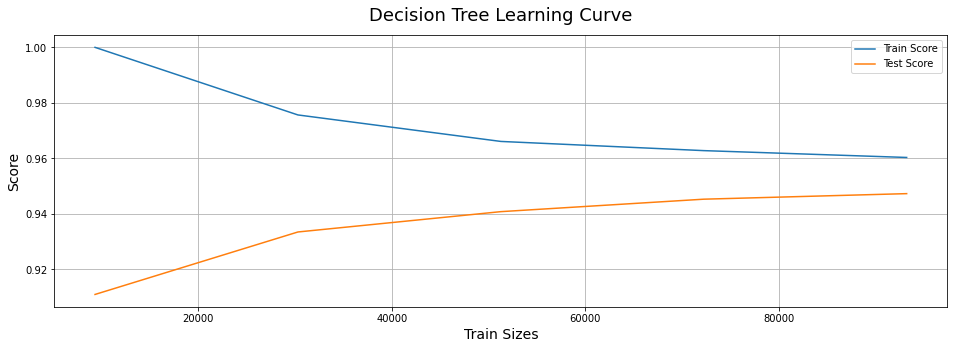

In [23]:
dtc_best=DecisionTreeClassifier(criterion='entropy', max_depth=25,max_leaf_nodes=1000)
dtc_best.fit(X_train,y_train)

pred_dtc=dtc_best.predict(X_test)
pred_dtc_train=dtc_best.predict(X_train)

print("For Test")
print('Confusion Matrix is \n',confusion_matrix(y_test,pred_dtc))
print('Accuracy is', accuracy_score(y_test,pred_dtc))
print('\n')

print("For Train")
print('Confusion Matrix is\n ',confusion_matrix(y_train,pred_dtc_train))
print('Accuracy is', accuracy_score(y_train,pred_dtc_train))
print('\n')

plt.figure(figsize = (16,5))
title = 'Decision Tree Learning Curve'
plotLearningCurves(X_train, y_train, dtc_best,title)

Test score is increasing with increase in train size and also converging with training score. It means our model is learning well. 

## Random Forest

In [29]:
rfc = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=40,max_leaf_nodes=4100)

rfc.fit(X_train_sc, y_train)

pred_rfc = rfc.predict(X_test_sc)
rfc_train= rfc.predict(X_train_sc)
print('Test Score:',accuracy_score(y_test,pred_rfc))
print('Train Score:',accuracy_score(y_train,rfc_train))

print('Confusion Matrix for test set  \n',confusion_matrix(y_test,pred_rfc))

#0.9477466379221846
#0.9887918518192618

Test Score: 0.9532782454243571
Train Score: 0.9830355763785203
Confusion Matrix for test set  
 [[5613  269]
 [ 336 6731]]


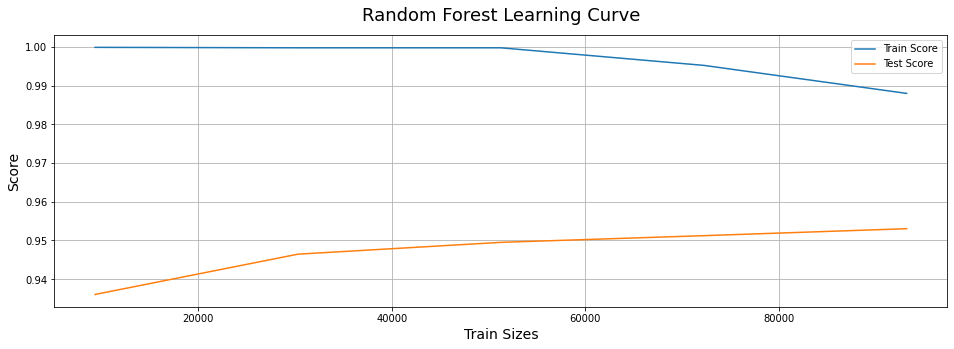

In [34]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve'
plotLearningCurves(X_train_sc, y_train, rfc,title)

We can see that as train sizes increases cross validation score and training score are converging. But still there is some deviation between them. With more data there will be less deviation between train and test score.

## Conclusion

In our proble to classify customers as satisfied or dissatisfied, best accuracy was achieved using RandomForest Classifier. The best train score and test score achieved are 0.98 and 0.95 respectively. While using random forest classifier there are least number of false prediction.